# Proditec 1

## Libraries

In [21]:
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt

In [22]:
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_logical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


## Constants

In [23]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 10
TRAINING_DIR = Path('./uc-data/Training Dataset (1002 images)')
TEST_DIR = Path('./uc-data/Test Dataset')

## Functions

In [24]:
def plot_hist(hist, metric="acc"):
    plt.plot(hist.history[metric])
    plt.plot(hist.history[f"val_{metric}"])
    plt.title(f"model {metric}")
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

## Load dataset + Data Augmentation

### Training & Validation dataset

In [25]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    # rescale=1.0 / 255,  # Rescale the images by 1/255
    rotation_range=30,  # Rotate the images by up to 30 degrees
    width_shift_range=0.2,  # Shift the images horizontally by up to 20%
    height_shift_range=0.2,  # Shift the images vertically by up to 20%
    zoom_range=0.2,  # Zoom in on the images by up to 20%
    horizontal_flip=True,  # Flip the images horizontally
    fill_mode="nearest",  # Fill in the empty pixels with the nearest pixel
    validation_split=0.2,  # Use 20% of the images for validation
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale the images by 1/255
    validation_split=0.2,
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),  # Resize the images to (224, 224)
    batch_size=BATCH_SIZE,  # Use a batch size of 32
    class_mode="categorical",  # Use categorical labels
    subset="training",  # Use the training subset
    shuffle=False, seed=13
)

validation_generator = valid_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),  # Resize the images to (224, 224)
    batch_size=BATCH_SIZE,  # Use a batch size of 32
    class_mode="categorical",  # Use categorical labels
    subset="validation",  # Use the validation subset}
    shuffle=False, seed=13
)

Found 804 images belonging to 6 classes.
Found 198 images belonging to 6 classes.


In [26]:
# Total samples in training set
train_samples = train_generator.samples
train_samples

804

In [27]:
train_generator.class_indices

{'CHIPS_BROKEN_COATED': 0,
 'CHIP_BROKEN_UNCOATED': 1,
 'COATING_DEFECTS': 2,
 'EDGE_DEFECTS': 3,
 'Good': 4,
 'LOGO_DEFECTS': 5}

In [28]:
num_classes = len(train_generator.class_indices)
num_classes

6

### Test dataset

In [29]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

Found 2744 images belonging to 6 classes.


### Print one sample of the Data Augmentation process

(32, 224, 224, 3)


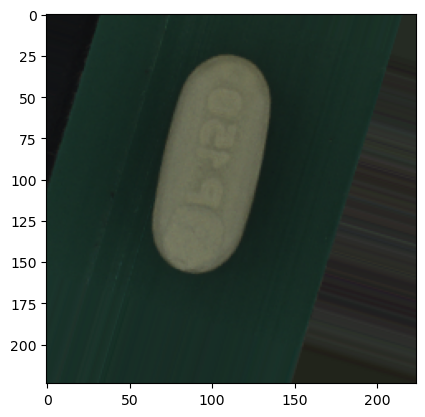

In [30]:
# batch=next(train_generator)  # returns the next batch of images and labels 
# print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
# image = batch[0][0].astype('uint8')
# plt.imshow(image)
# plt.show()

## Model creation
We will use EfficientNetB0

In [31]:
# conv_base = tf.keras.applications.EfficientNetB0(weights=None, include_top=False, classes=num_classes)
# conv_base = tf.keras.applications.EfficientNetB0(weights=None, include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
# conv_base = tf.keras.applications.ResNet50(include_top=False, classes=num_classes, weights=None, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
conv_base = tf.keras.applications.ResNet50(include_top=False, weights=None, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
model = tf.keras.models.Sequential() # Create a sequential model
model.add(conv_base) # Add the convolutional base to the model
model.add(tf.keras.layers.GlobalMaxPooling2D(name="gap")) # Add a global spatial average pooling layer
model.add(tf.keras.layers.Dropout(rate=0.2, name="dropout_out")) # Add a dropout layer with a dropout rate of 0.2 to avoid overfitting
model.add(tf.keras.layers.Dense(num_classes, activation="softmax", name="fc_out")) # Set NUMBER_OF_CLASSES to the number of your final predictions.
# conv_base.trainable = False

In [32]:
# inputs = tf.keras.layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
# x = tf.keras.applications.EfficientNetB0(weights=None, include_top=False, classes=num_classes)(inputs)
# x = tf.keras.layers.GlobalMaxPooling2D(name="gap")(x)
# outputs = tf.keras.layers.Dropout(rate=0.2, name="dropout_out")(x)
# outputs = tf.keras.layers.Dense(num_classes, activation="softmax", name="fc_out")(outputs)

# model = tf.keras.Model(inputs, outputs)
# model.compile(
#     optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
# )

In [33]:
# model_d=tf.keras.applications.DenseNet121(weights=None,include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)) 

# x=model_d.output

# x= tf.keras.layers.GlobalAveragePooling2D()(x)
# x= tf.keras.layers.BatchNormalization()(x)
# x= tf.keras.layers.Dropout(0.5)(x)
# x= tf.keras.layers.Dense(1024,activation='relu')(x) 
# x= tf.keras.layers.Dense(512,activation='relu')(x) 
# x= tf.keras.layers.BatchNormalization()(x)
# x= tf.keras.layers.Dropout(0.5)(x)

# preds=tf.keras.layers.Dense(num_classes,activation='softmax')(x) #FC-layer
# model = tf.keras.Model(inputs=model_d.input,outputs=preds)


In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 gap (GlobalMaxPooling2D)    (None, 2048)              0         
                                                                 
 dropout_out (Dropout)       (None, 2048)              0         
                                                                 
 fc_out (Dense)              (None, 6)                 12294     
                                                                 
Total params: 23,600,006
Trainable params: 23,546,886
Non-trainable params: 53,120
_________________________________________________________________


In [35]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"],
)

In [36]:
train_generator.n

804

In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE, 
    epochs=500,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // BATCH_SIZE,
    verbose=1,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor="val_loss", restore_best_weights=True)],
    # use_multiprocessing=True,
    # workers=4,
)

Epoch 1/500
25/25 [==============================] - 26s 659ms/step - loss: 6.5762 - acc: 0.2111 - val_loss: 1.7535 - val_acc: 0.0729
Epoch 2/500
25/25 [==============================] - 16s 644ms/step - loss: 5.3335 - acc: 0.2798 - val_loss: 1.8183 - val_acc: 0.0729
Epoch 3/500
25/25 [==============================] - 16s 626ms/step - loss: 4.7060 - acc: 0.3148 - val_loss: 1.9327 - val_acc: 0.0729
Epoch 4/500
25/25 [==============================] - 16s 633ms/step - loss: 4.4165 - acc: 0.2565 - val_loss: 1.9806 - val_acc: 0.0729
Epoch 5/500
25/25 [==============================] - 18s 698ms/step - loss: 4.4638 - acc: 0.2863 - val_loss: 2.0173 - val_acc: 0.0729
Epoch 6/500
25/25 [==============================] - 18s 706ms/step - loss: 4.1231 - acc: 0.3381 - val_loss: 2.1341 - val_acc: 0.0729
Epoch 7/500
25/25 [==============================] - 16s 609ms/step - loss: 4.4100 - acc: 0.3562 - val_loss: 2.2670 - val_acc: 0.0729
Epoch 8/500
25/25 [==============================] - 16s 641ms

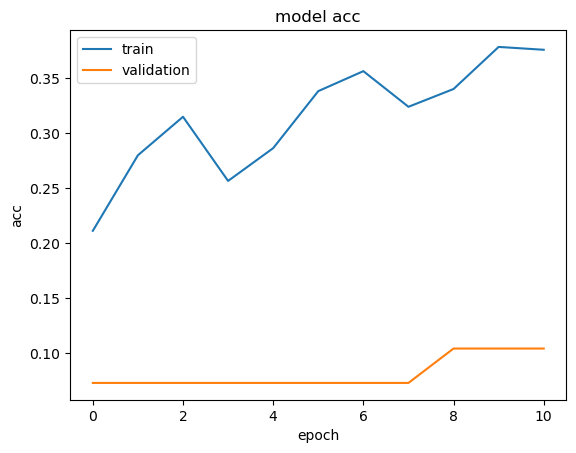

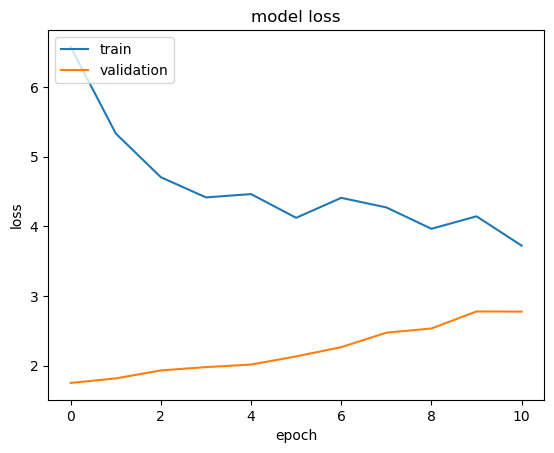

In [38]:
plot_hist(history, "acc")
plot_hist(history, "loss")

In [39]:
scores = model.evaluate(test_generator)
scores

86/86 [==============================] - 20s 238ms/step - loss: 1.7645 - acc: 0.0765


[1.7644844055175781, 0.07653061300516129]

In [40]:
# batch=next(test_generator)  # returns the next batch of images and labels 
# print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
# image = batch[0][0].astype('uint8')
# plt.imshow(image)
# plt.show()